<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/Introduction_to_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)
df.index.freq = 'MS'
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [10]:
df.tail()

,Passengers
Month,
1960-08,606
1960-09,508
1960-10,461
1960-11,390
1960-12,432


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


## **Train Test Split**

In [12]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

<Axes: xlabel='Month'>

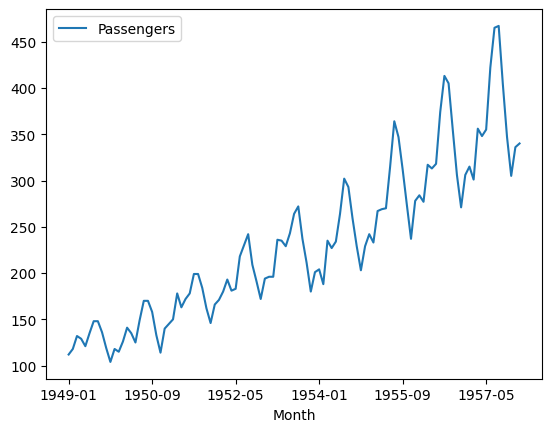

In [13]:
train_data.plot()

## **Fitting the Model**

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


## **Evaluating Model Against Test Set**

In [16]:
test_predictions = fitted_model.forecast(len(test_data)).rename('HW Forecast')

In [17]:
test_predictions

,HW Forecast
1958-02-01,339.142914
1958-03-01,399.281625
1958-04-01,394.233547
1958-05-01,402.545191
1958-06-01,473.128655
1958-07-01,521.795218
1958-08-01,514.513539
1958-09-01,446.216769
1958-10-01,385.430905
1958-11-01,339.645052


In [18]:
df.tail()

,Passengers
Month,
1960-08,606
1960-09,508
1960-10,461
1960-11,390
1960-12,432


(<Axes: xlabel='Month'>, <Axes: xlabel='Month'>)

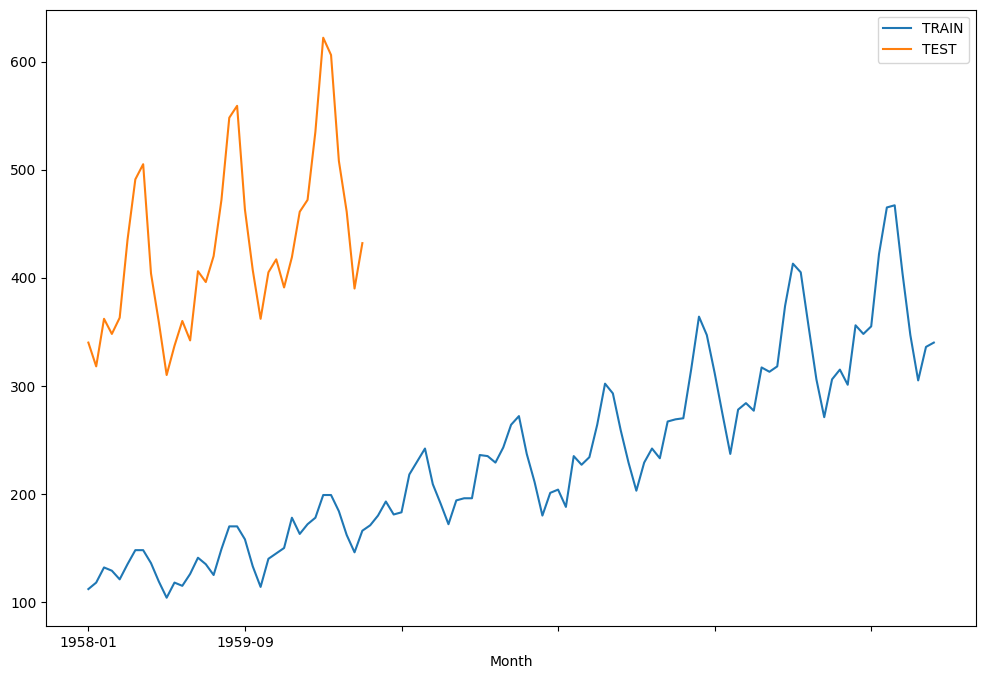

In [21]:
train_data['Passengers'].plot(legend=True, label='TRAIN')
test_data['Passengers'].plot(legend=True, label='TEST', figsize=(12, 8))

<Axes: xlabel='Month'>

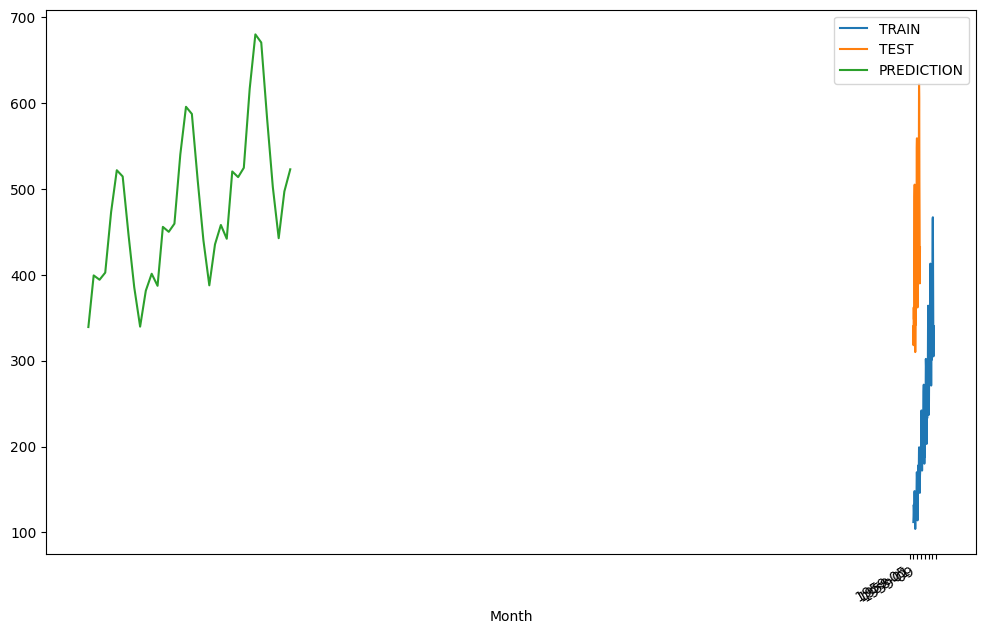

In [23]:
train_data['Passengers'].plot(legend=True, label='TRAIN')
test_data['Passengers'].plot(legend=True, label='TEST', figsize=(12, 8))
test_predictions.plot(legend=True, label='PREDICTION')